In [6]:
# Early WIP

In [7]:
# V 1.10
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

# colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a', '#d98818i']
colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [8]:
# Additional Imports
import zipcodes

In [9]:
df = pd.read_csv(ZipFile('data/emergency911calls.zip').open('911.csv'), 
                parse_dates=['timeStamp'])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,"19,525.00",EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,"19,446.00",EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,"19,401.00",Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


In [10]:
df.shape

(266543, 9)

In [11]:
df.columns

new_columns = ['lat', 'long', 'description', 'zip', 'title', 'timeStamp', 
               'township', 'addres', 'e']
df.columns = new_columns
df.head()

,lat,long,description,zip,title,timeStamp,township,addres,e
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,"19,525.00",EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,"19,446.00",EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,"19,401.00",Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,"19,401.00",EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
lat            266543 non-null float64
long           266543 non-null float64
description    266543 non-null object
zip            234049 non-null float64
title          266543 non-null object
timeStamp      266543 non-null datetime64[ns]
township       266448 non-null object
addres         266543 non-null object
e              266543 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.3+ MB


In [13]:
df.describe()

,lat,long,zip,e
count,"266,543.00","266,543.00","234,049.00","266,543.00"
mean,40.16,-75.32,"19,235.19",1.00
std,0.09,0.16,306.36,0.00
min,30.33,-95.60,"17,555.00",1.00
25%,40.10,-75.39,"19,038.00",1.00
50%,40.14,-75.30,"19,401.00",1.00
75%,40.23,-75.21,"19,446.00",1.00
max,41.17,-74.81,"77,316.00",1.00


In [14]:
df.describe(include=['object']).T

,count,unique,top,freq
description,266543,266484,GERMANTOWN PIKE; WORCESTER; 2017-09-27 @ 17:50...,4
title,266543,130,Traffic: VEHICLE ACCIDENT -,62218
township,266448,68,LOWER MERION,22886
addres,266543,31293,SHANNONDELL DR & SHANNONDELL BLVD,2659


In [15]:
df.isnull().sum()

lat                0
long               0
description        0
zip            32494
title              0
timeStamp          0
township          95
addres             0
e                  0
dtype: int64

In [16]:
df.e.unique()

array([1])

We can drop 'e' whatever it is - there is only one value

In [17]:
df.drop(['e'], axis=1, inplace=True)

#### Missing values 

In [18]:
df.isnull().sum()

lat                0
long               0
description        0
zip            32494
title              0
timeStamp          0
township          95
addres             0
dtype: int64

#### Missing values as a percentage

In [19]:
df.isnull().sum() / df.shape[0] * 100

lat            0.00
long           0.00
description    0.00
zip           12.19
title          0.00
timeStamp      0.00
township       0.04
addres         0.00
dtype: float64

In [20]:
# Shows rows that include missing values.
df[df.isnull().T.any().T][:10]

,lat,long,description,zip,title,timeStamp,township,addres
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END
10,40.23,-75.25,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,nan,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD
14,40.10,-75.38,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,nan,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS
23,40.14,-75.42,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,nan,Traffic: DISABLED VEHICLE -,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS
24,40.15,-75.19,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,nan,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS
28,40.10,-75.38,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,nan,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:05:39,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS
30,40.10,-75.38,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,nan,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:07:01,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS
34,40.22,-75.29,MORRIS RD & MUHLENBURG DR; UPPER GWYNEDD; 2015...,nan,Traffic: DISABLED VEHICLE -,2015-12-10 18:23:13,UPPER GWYNEDD,MORRIS RD & MUHLENBURG DR
37,40.07,-75.31,CONSHOHOCKEN STATE RD; WEST CONSHOHOCKEN; Sta...,nan,EMS: VEHICLE ACCIDENT,2015-12-10 18:29:54,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD
42,40.02,-75.28,ROSEMONT AVE & DEAD END; LOWER MERION; Statio...,nan,EMS: CARDIAC EMERGENCY,2015-12-10 18:43:07,LOWER MERION,ROSEMONT AVE & DEAD END


# New Features

In [21]:
df['year'] = df.timeStamp.dt.year
df['month'] = df.timeStamp.dt.month
df['dow'] = df.timeStamp.dt.dayofweek
df['hour'] = df.timeStamp.dt.hour

In [22]:
df['zip'] = df.zip.dropna().apply(lambda x: str(x).split('.')[0])

Zipcodes is pretty awesome library but really slow.

In [23]:
# df.zip.dropna().apply(lambda x: zipcodes.matching(x)[0]['city'])

In [24]:
df['type'] = df.title.apply(lambda x: x.split(':')[0])
df['accident'] = df.title.apply(lambda x: x.split(':')[1].strip(' -'))

In [25]:
df.columns

Index(['lat', 'long', 'description', 'zip', 'title', 'timeStamp', 'township',
       'addres', 'year', 'month', 'dow', 'hour', 'type', 'accident'],
      dtype='object')

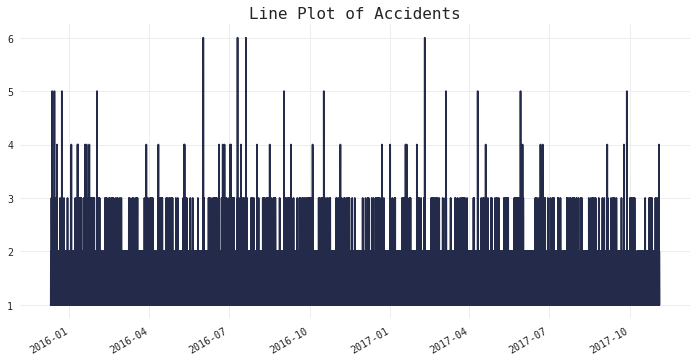

In [26]:
df.timeStamp.value_counts().sort_index().plot(kind='line', color=MC)
plt.title('Line Plot of Accidents');

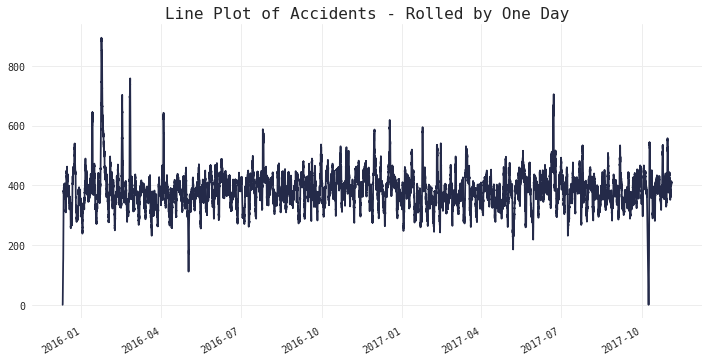

In [27]:
df.timeStamp.value_counts().sort_index().rolling('1d').sum().plot(kind='line', color=MC)
plt.title('Line Plot of Accidents - Rolled by One Day');

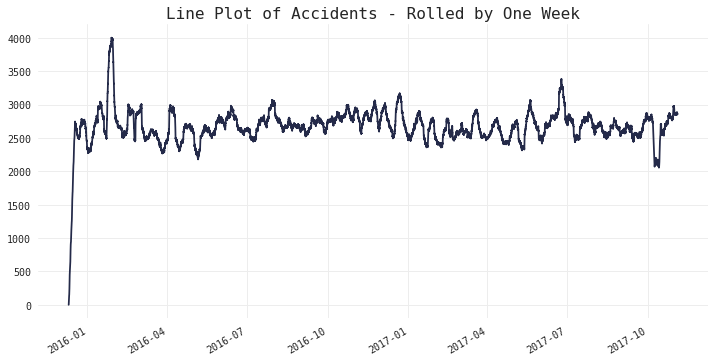

In [28]:
df.timeStamp.value_counts().sort_index().rolling('7d').sum().plot(kind='line', color=MC);
plt.title('Line Plot of Accidents - Rolled by One Week');

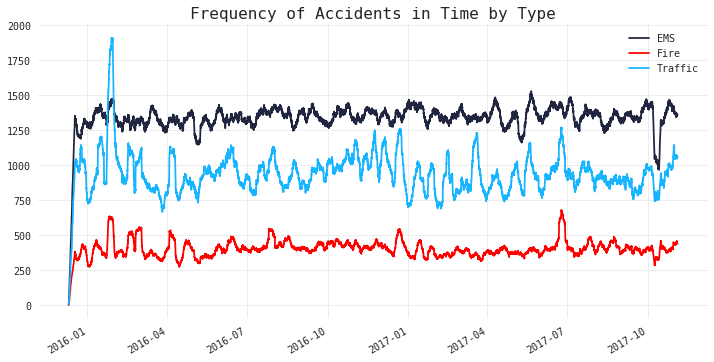

In [29]:
df.timeStamp[df.type == 'EMS'].value_counts().sort_index().rolling('7d').sum().plot(kind='line', color=colors[0], label='EMS');
df.timeStamp[df.type == 'Fire'].value_counts().sort_index().rolling('7d').sum().plot(kind='line', color=colors[2], label='Fire');
df.timeStamp[df.type == 'Traffic'].value_counts().sort_index().rolling('7d').sum().plot(kind='line', color=colors[1], label='Traffic');
plt.legend()
plt.title('Frequency of Accidents in Time by Type')

array(['lat', 'long', 'year', 'month', 'dow', 'hour'], dtype=object)

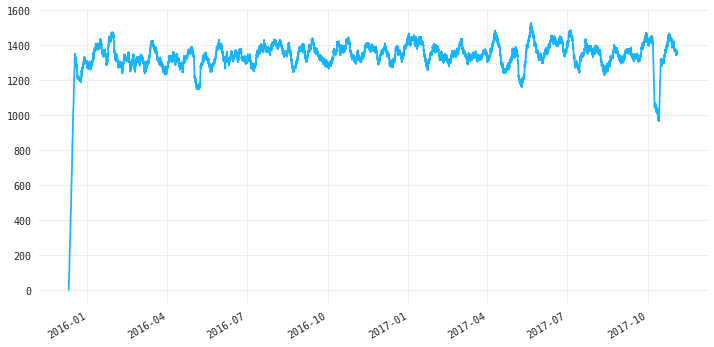

In [30]:

df.timeStamp[df.type == 'EMS'].value_counts().sort_index().rolling('7d').sum().plot(kind='line', color=colors[1], label='EMS');df._get_numeric_data().columns.values

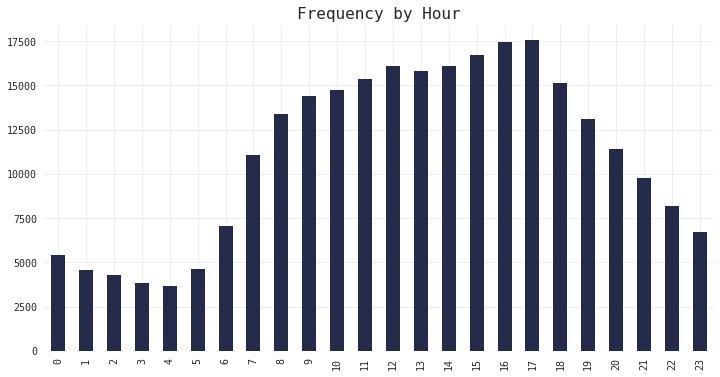

In [31]:
df.hour.value_counts().sort_index().plot(kind='bar', color=MC);
plt.title('Frequency by Hour');

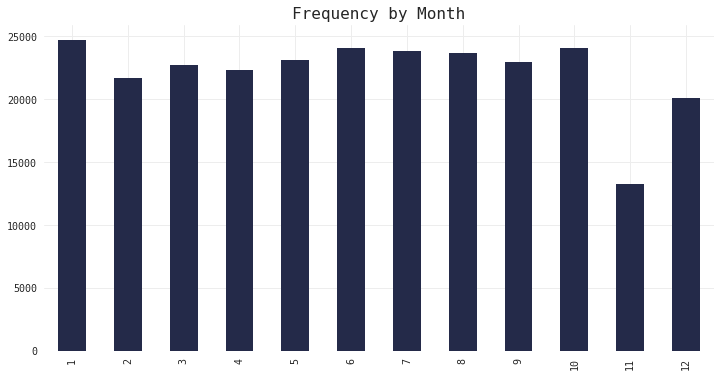

In [32]:
df.month.value_counts().sort_index().plot(kind='bar', color=MC);
plt.title('Frequency by Month');

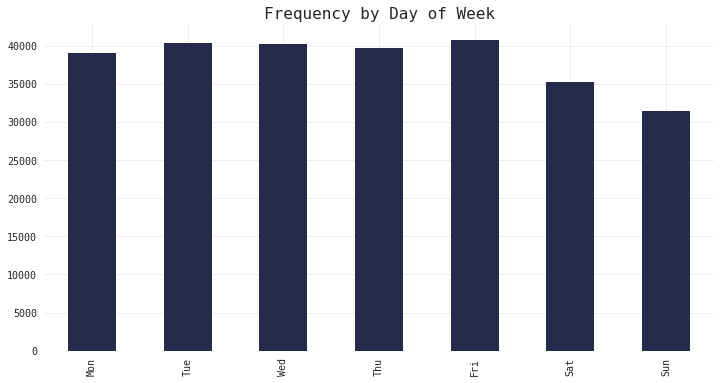

In [33]:
df.dow.value_counts().sort_index().plot(kind='bar', color=MC);
plt.title('Frequency by Day of Week');
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

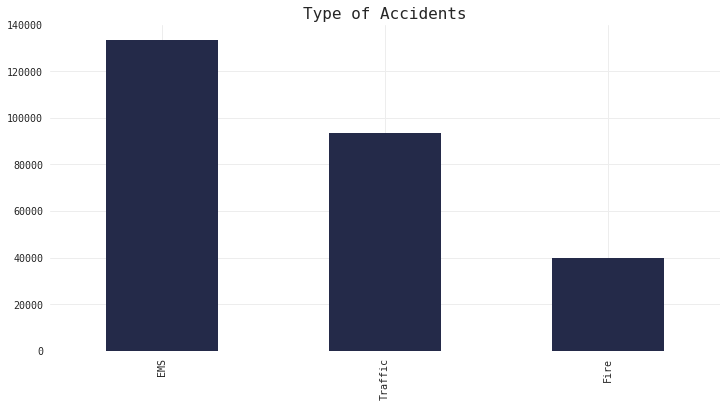

In [34]:
df.type.value_counts().plot(kind='bar', color=MC)
plt.title("Type of Accidents");

In [35]:
df.accident.value_counts()[:50]

VEHICLE ACCIDENT             77629
DISABLED VEHICLE             18928
FIRE ALARM                   15143
RESPIRATORY EMERGENCY        13504
CARDIAC EMERGENCY            13422
FALL VICTIM                  13414
ROAD OBSTRUCTION              8209
SUBJECT IN PAIN               7505
HEAD INJURY                   7048
UNKNOWN MEDICAL EMERGENCY     4792
SYNCOPAL EPISODE              4584
SEIZURES                      4418
GENERAL WEAKNESS              4211
ALTERED MENTAL STATUS         3880
ABDOMINAL PAINS               3846
FIRE INVESTIGATION            3730
MEDICAL ALERT ALARM           3727
OVERDOSE                      3416
UNCONSCIOUS SUBJECT           3385
HEMORRHAGING                  3368
CVA/STROKE                    3331
NAUSEA/VOMITING               3115
VEHICLE FIRE                  2939
GAS-ODOR/LEAK                 2895
BUILDING FIRE                 2547
DIABETIC EMERGENCY            2361
HAZARDOUS ROAD CONDITIONS     2332
CARDIAC ARREST                2315
DIZZINESS           

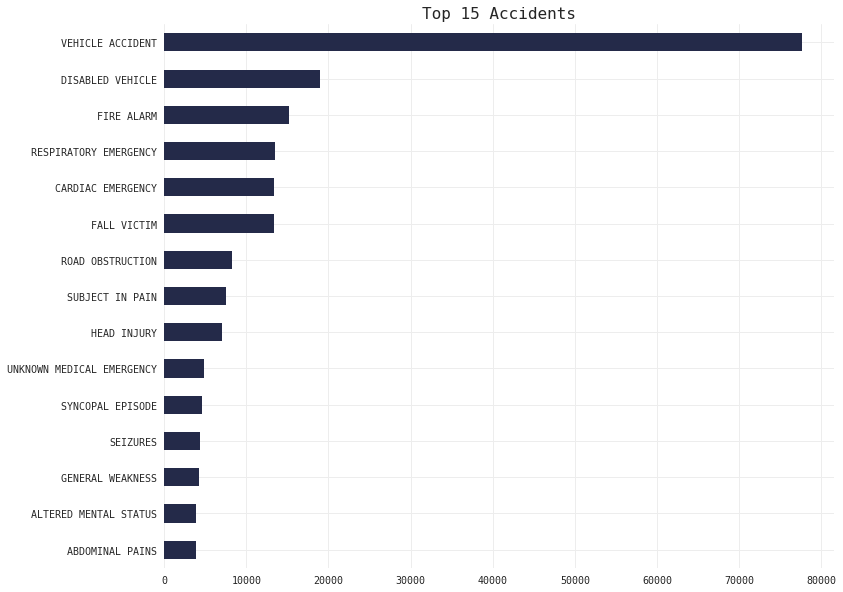

In [36]:
top_range = 15
plt.figure(figsize=(12, 10))
df.accident.value_counts()[:top_range].sort_values(ascending=True).plot(kind='barh', color=MC)
plt.title('Top {} Accidents'.format(top_range));

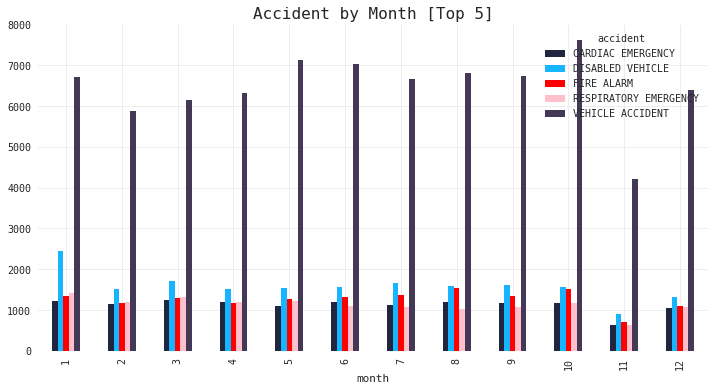

In [37]:
top5accidents = df.accident.value_counts()[:5].index
top5accidents_df = df[df.accident.isin(top5accidents)]
pd.crosstab(top5accidents_df.month, top5accidents_df.accident,).plot(kind='bar', color=colors);
plt.title('Accident by Month [Top 5]');

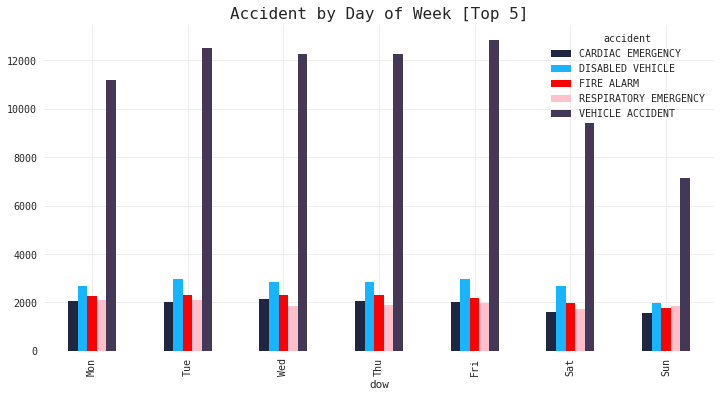

In [38]:
top5accidents_df = df[df.accident.isin(top5accidents)]
pd.crosstab(top5accidents_df.dow, top5accidents_df.accident,).plot(kind='bar', color=colors);
plt.title('Accident by Day of Week [Top 5]');
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

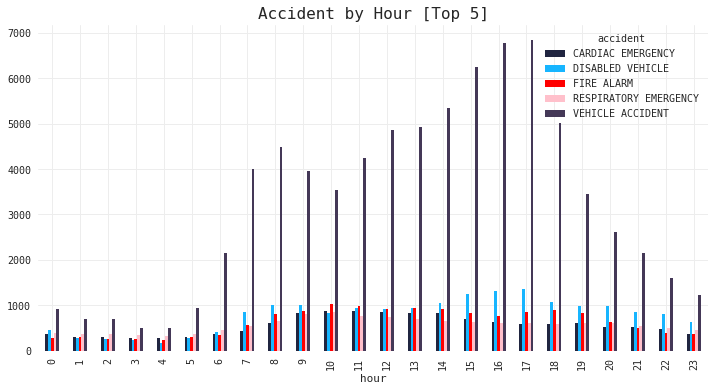

In [39]:
top5accidents_df = df[df.accident.isin(top5accidents)]
pd.crosstab(top5accidents_df.hour, top5accidents_df.accident,).plot(kind='bar', color=colors);
plt.title('Accident by Hour [Top 5]');

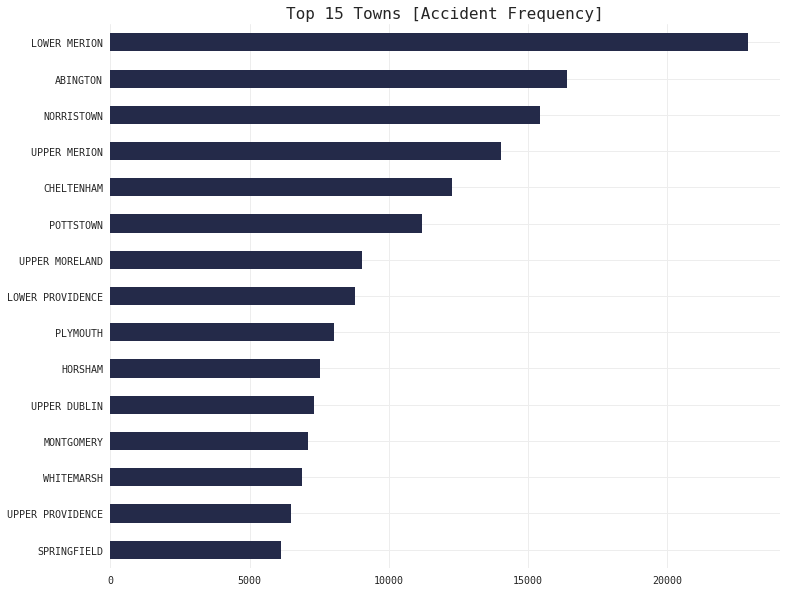

In [40]:
top_range = 15
plt.figure(figsize=(12, 10))
df.township.value_counts()[:top_range].sort_values(ascending=True).plot(kind='barh', color=MC)
plt.title('Top {} Towns [Accident Frequency]'.format(top_range));

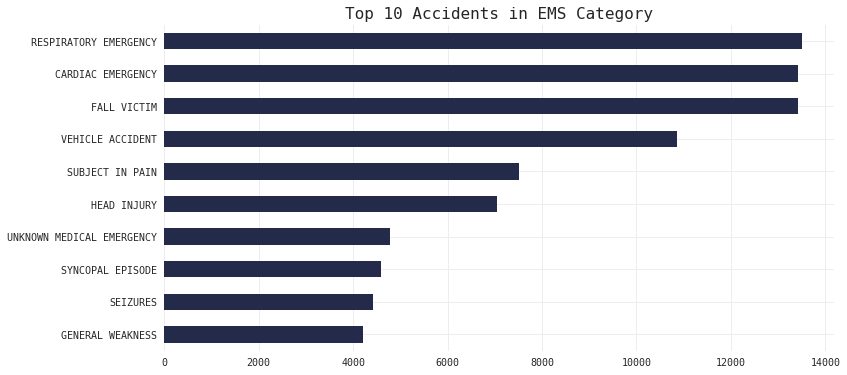

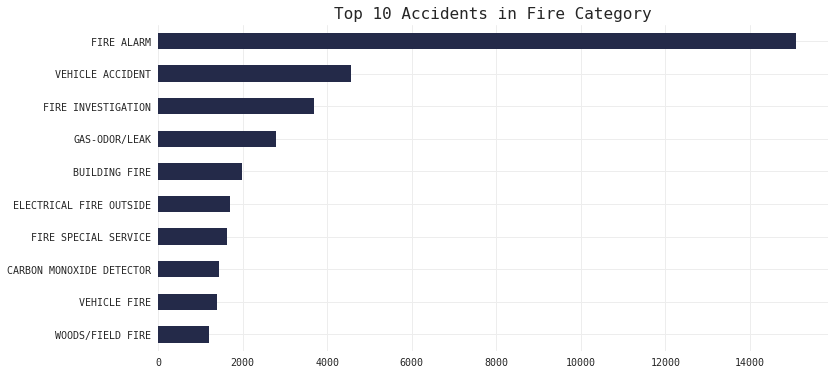

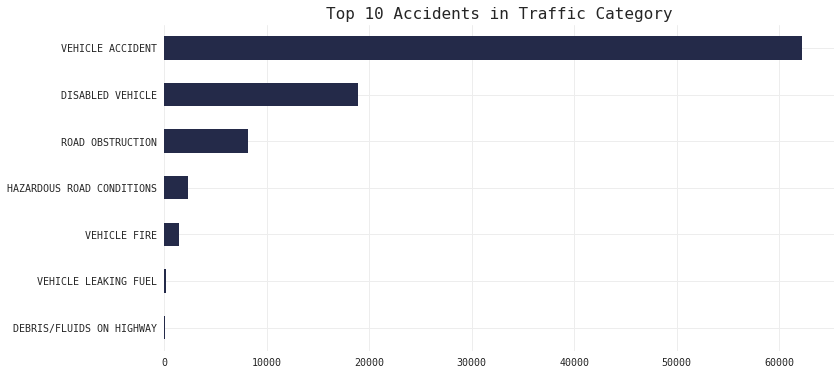

In [41]:
top_range = 10
for accident_type in df.type.unique():
    df[df.type == accident_type].accident.value_counts()[:top_range].sort_values().plot(kind='barh', color=MC);
    plt.title('Top {} Accidents in {} Category'.format(top_range, accident_type));
    plt.show()

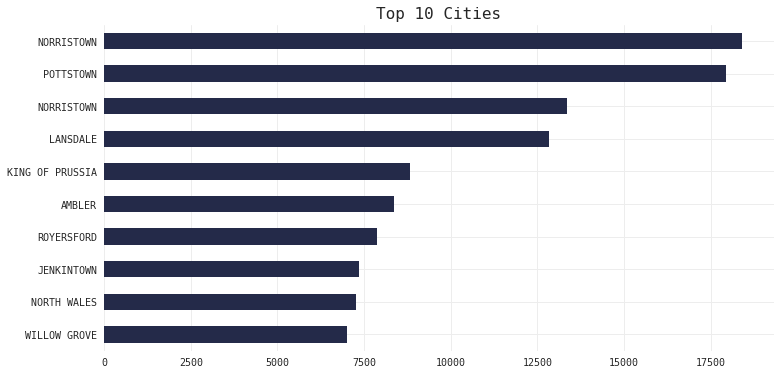

In [42]:
top_range = 10
top_zips = df.zip.value_counts()[:top_range].sort_values()
top_zips.plot(kind='barh', color=MC);
top_zips_names = [zipcodes.matching(x)[0]['city'] for x in top_zips.index]
plt.yticks(range(top_range), top_zips_names);
plt.title('Top {} Cities'.format(top_range));

In [43]:
# month to dow heatmap

In [44]:
# month vs day heatmao

In [45]:
# vehicle accidents by day and hour heatmap

In [46]:
# cardiac emergency calls by day and hour

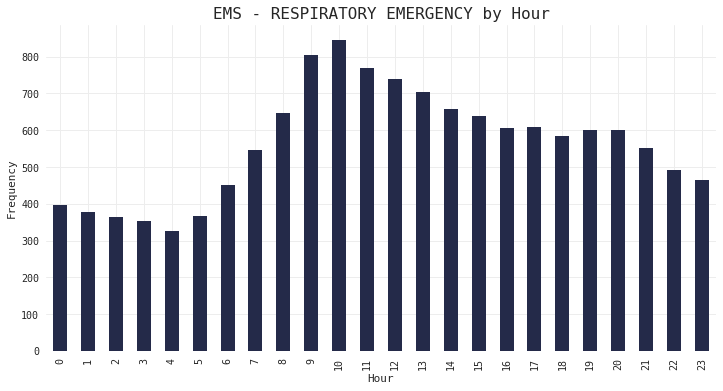

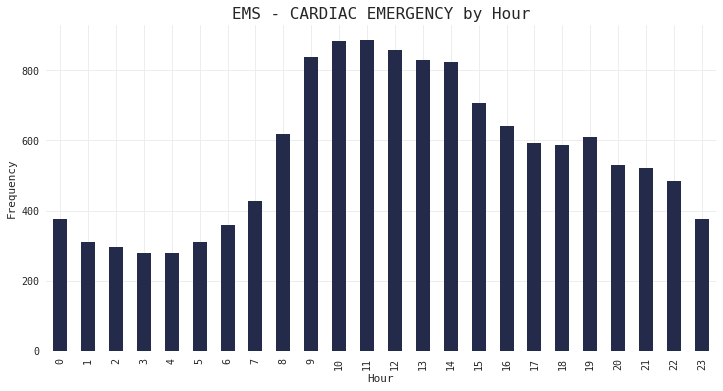

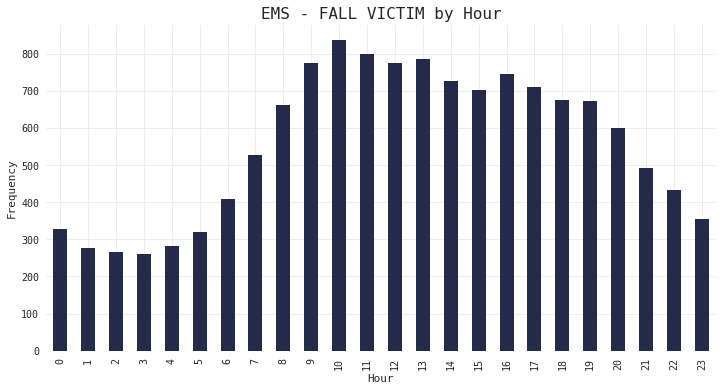

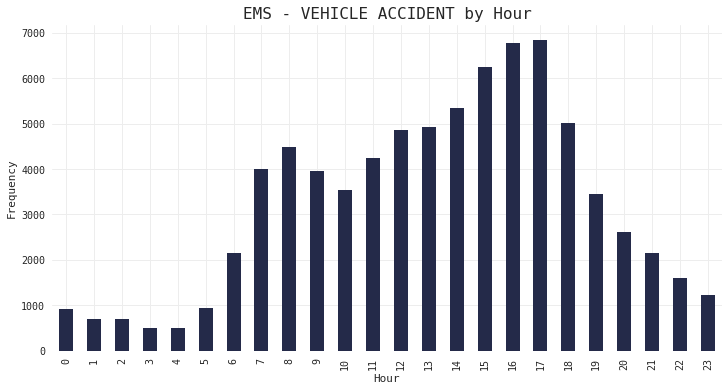

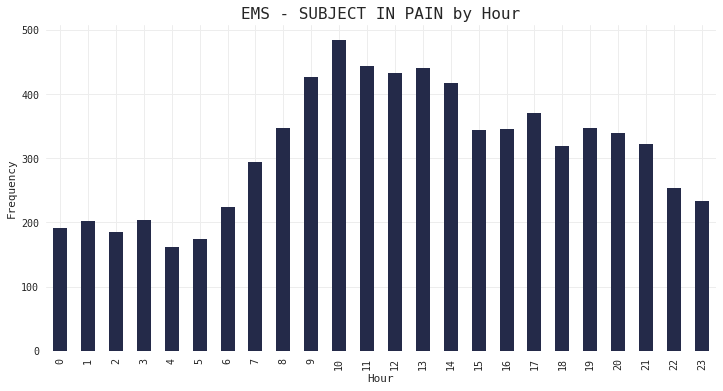

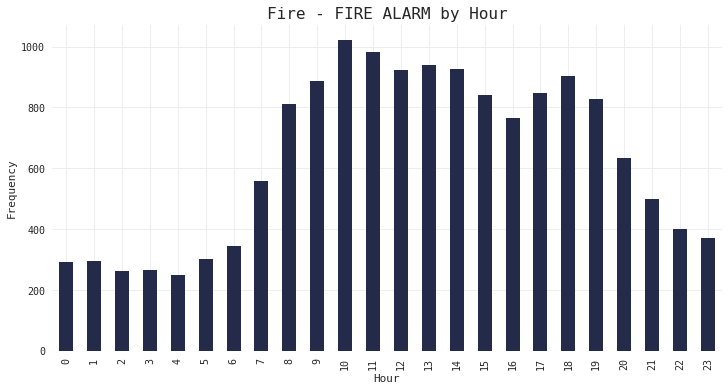

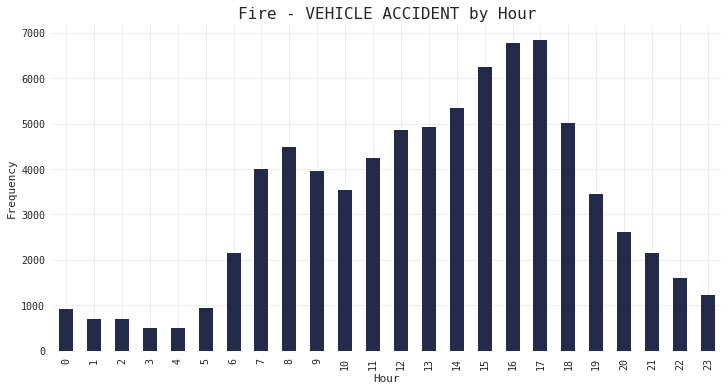

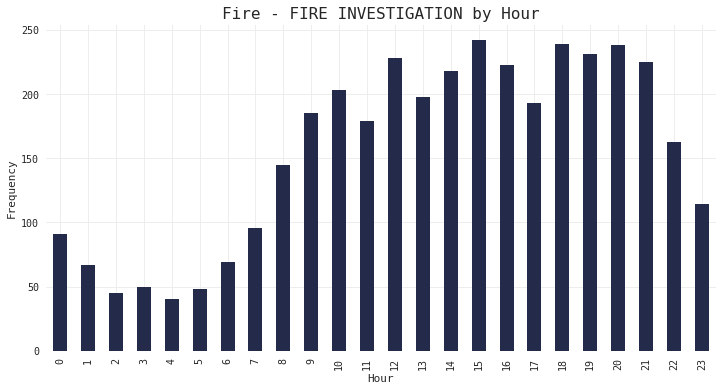

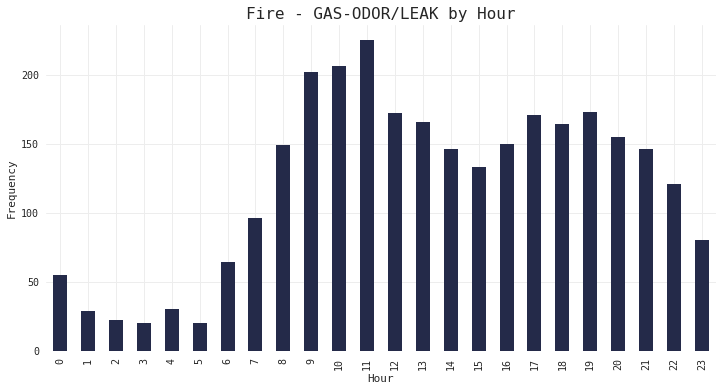

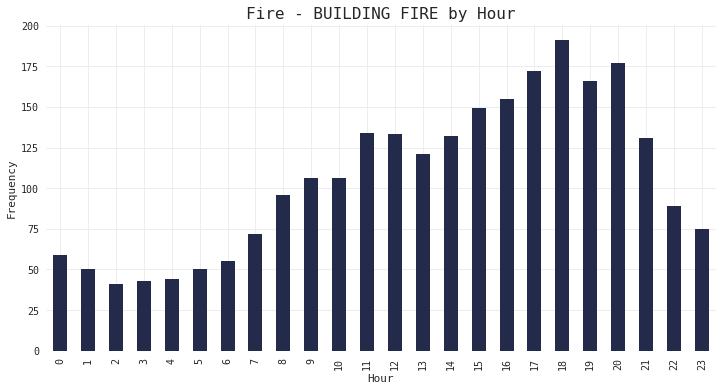

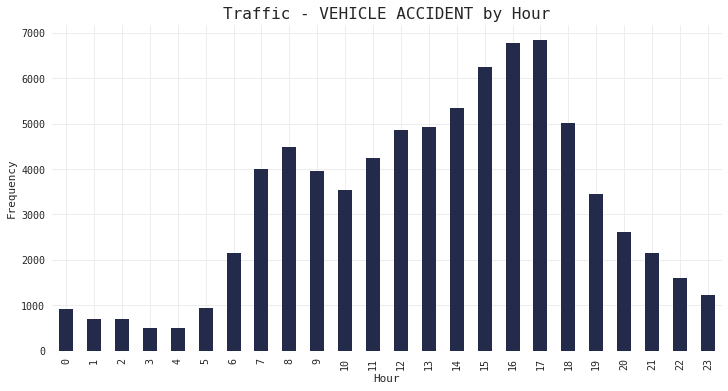

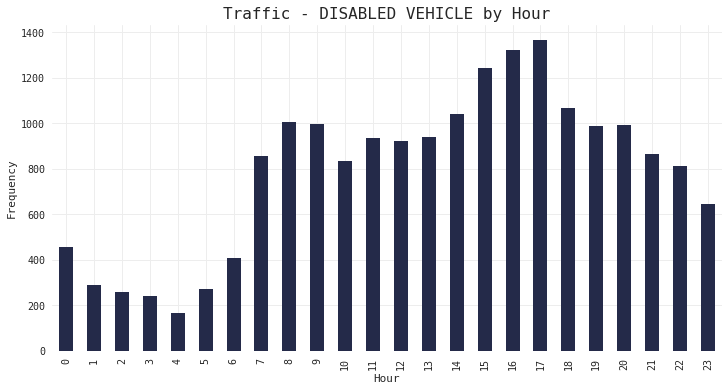

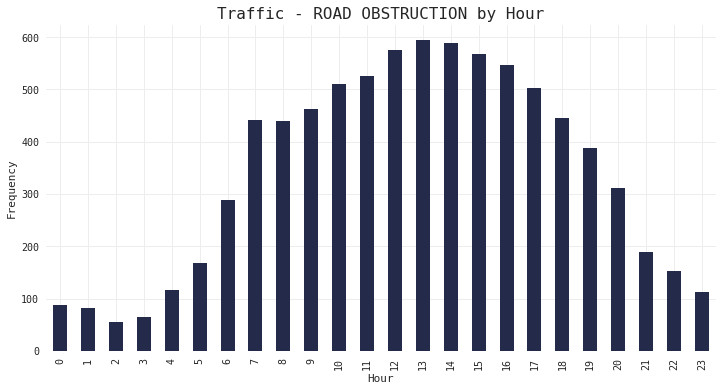

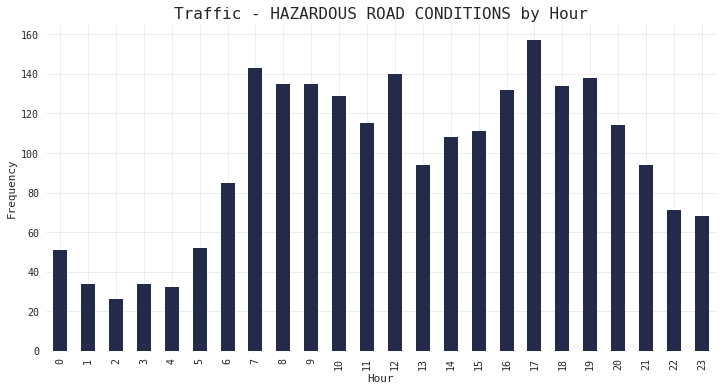

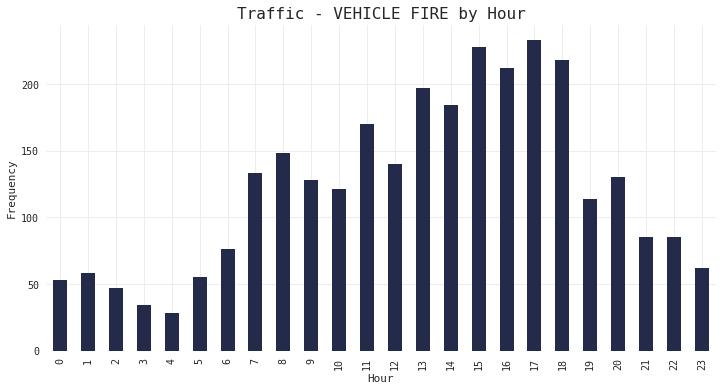

In [54]:
top_range = 5
for accident_type in df.type.unique():
    top_accidents = df[df.type == accident_type].accident.value_counts()[:top_range].index
    
    for accident in top_accidents:
        df[df.accident == accident].hour.value_counts().sort_index().plot('bar', color=MC)
        plt.title('{} - {} by Hour'.format(accident_type, accident))
        plt.ylabel('Frequency')
        plt.xlabel('Hour')
        plt.show();

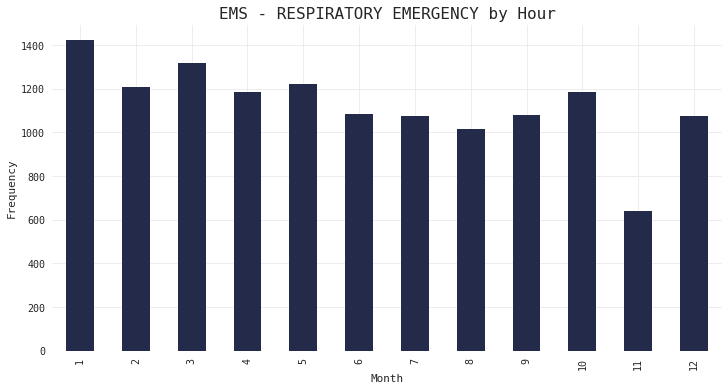

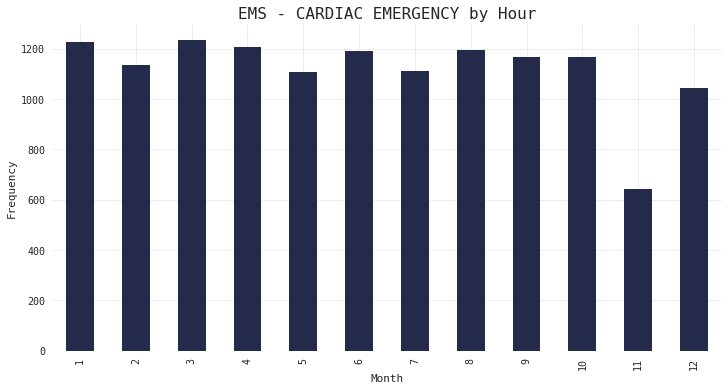

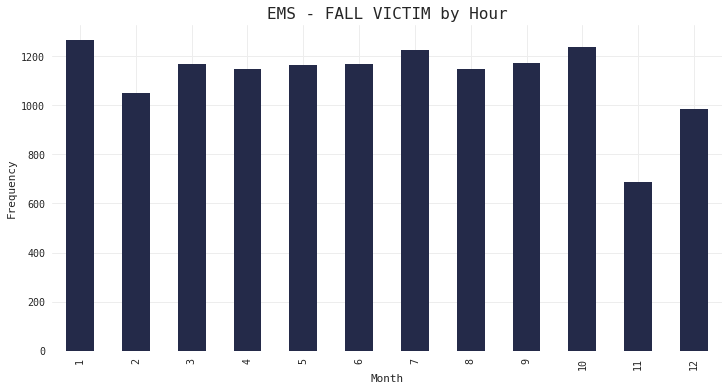

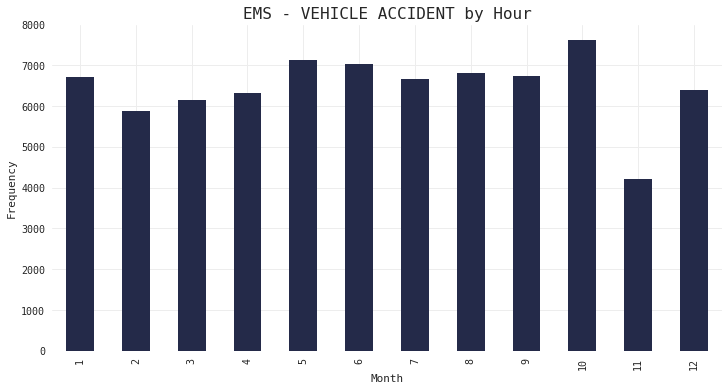

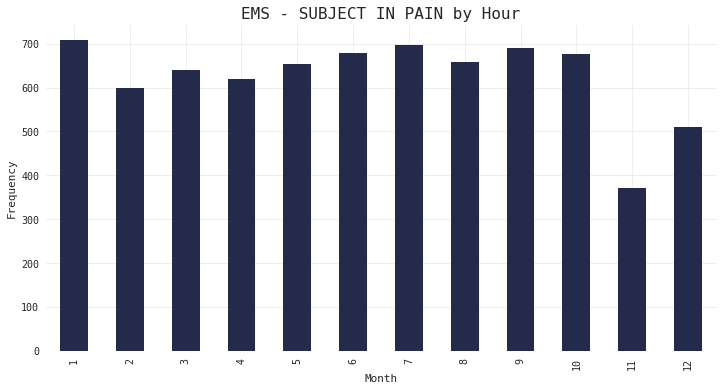

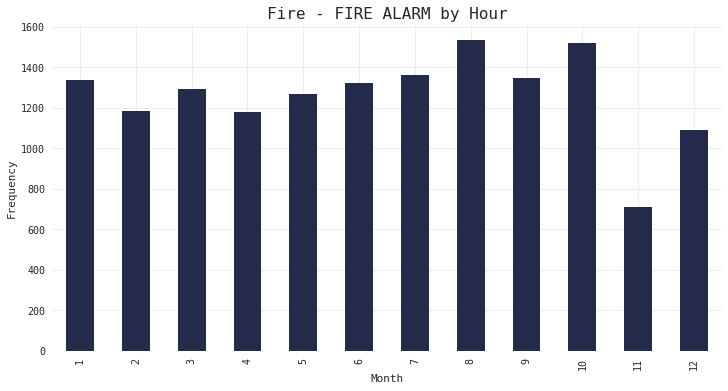

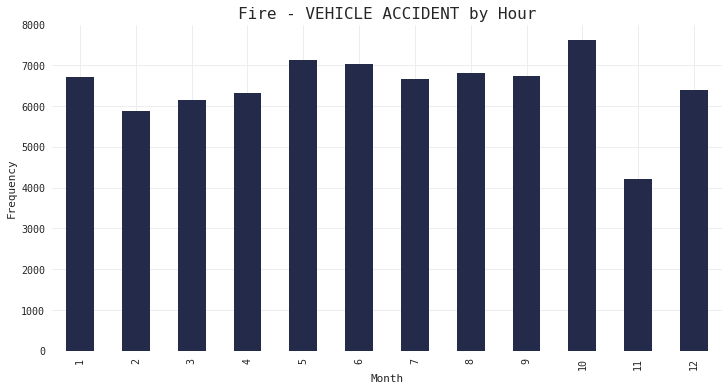

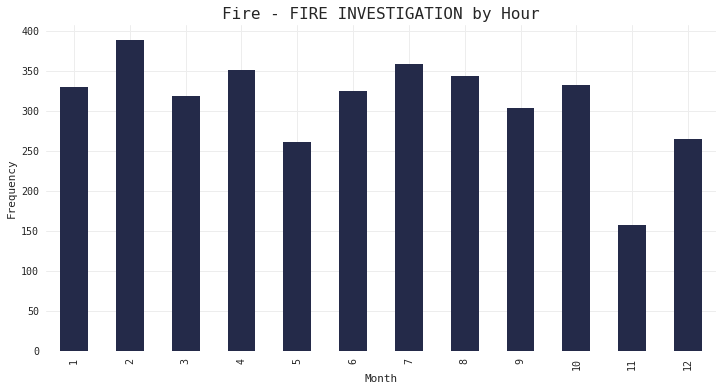

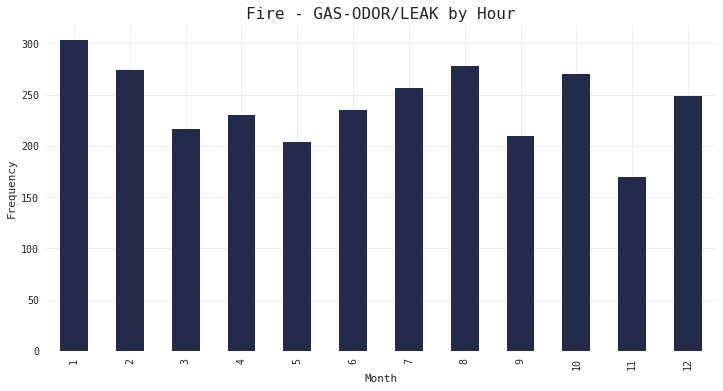

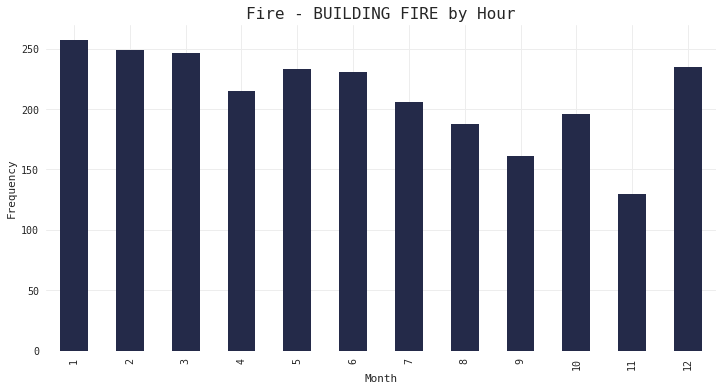

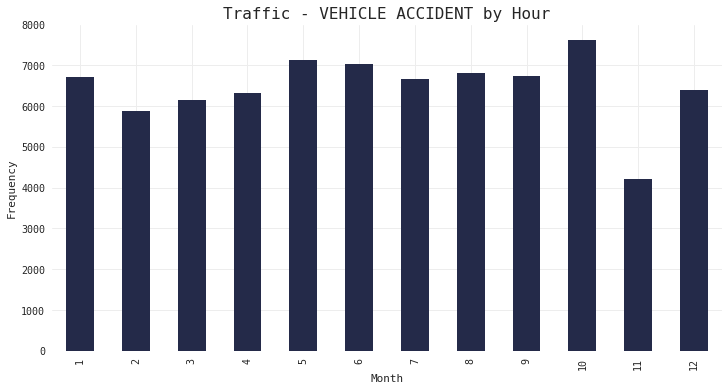

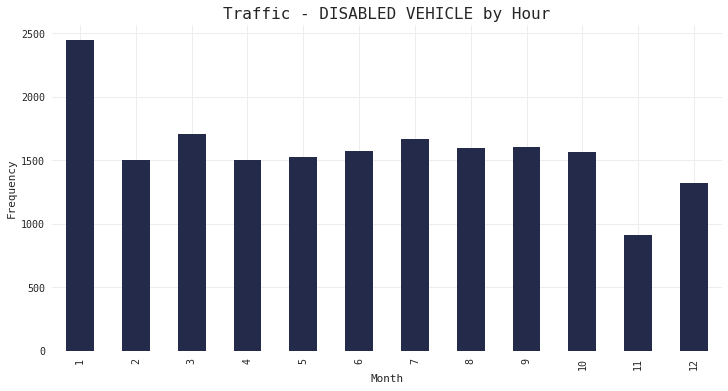

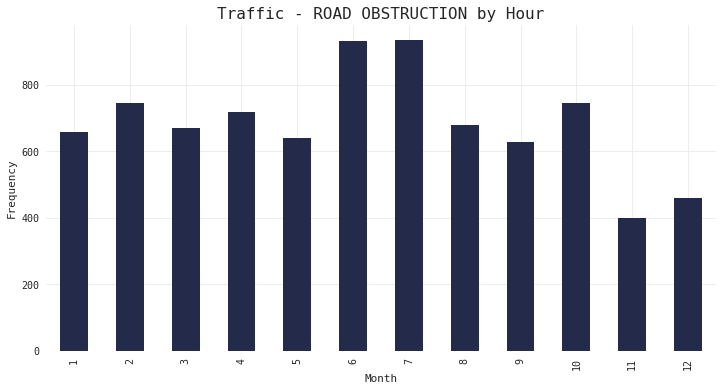

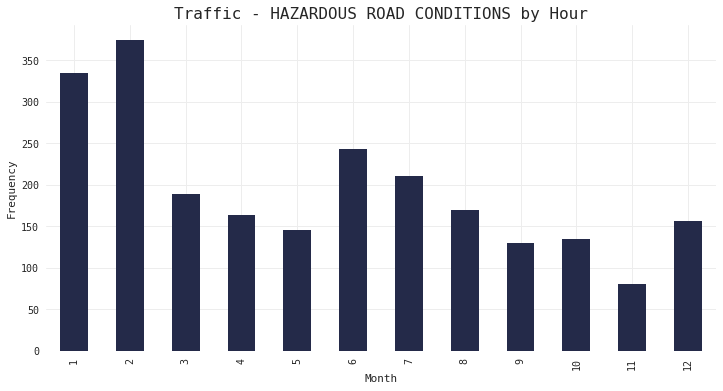

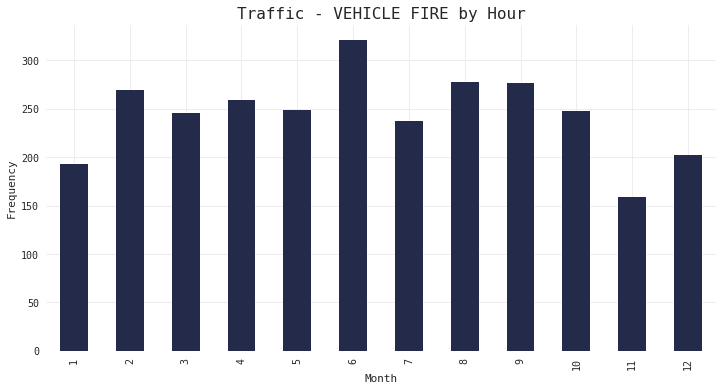

In [55]:
top_range = 5
for accident_type in df.type.unique():
    top_accidents = df[df.type == accident_type].accident.value_counts()[:top_range].index
    
    for accident in top_accidents:
        df[df.accident == accident].month.value_counts().sort_index().plot('bar', color=MC)
        plt.title('{} - {} by Hour'.format(accident_type, accident))
        plt.ylabel('Frequency')
        plt.xlabel('Month')
        plt.show();